# <font color='#2F4F4F'>AfterWork Data Science: Text Classification with Python - Project</font>

## <font color='#2F4F4F'>Step 1. Business Understading </font>

### a) Specifying the Research Question

Build a text classification model that classifies a given text input as written in english or in dutch.

### b) Defining the Metric for Success

Build a classification model with an accuracy of score of atleast 85%.

### c) Understanding the Context 

You work as a Computational Linguist for a Global firm, collaborating with Engineers and
Researchers in Assistant and Research & Machine Intelligence to develop language
understanding models that improve our ability to understand and generate natural
language.

### d) Recording the Experimental Design

* Business Understanding
* Data Exploration
* Data Preparation
* Data Modeling and Evaluation
* Summary of Findings 
* Recommendation
* Challenges


## <font color='#2F4F4F'>Step 2. Data Importation</font>

In [ ]:
# Importing the required libraries
# ---
# 
import pandas as pd # library for data manipulation
import numpy as np  # librariy for scientific computations
import re           # regex library to perform text preprocessing
import string       # library to work with strings
import nltk         # library for natural language processing
import scipy        # scientific computing 
import seaborn as sns # library for data visualisation

# to display all columns
pd.set_option('display.max.columns', None)

# to display the entire contents of a cell
pd.set_option('display.max_colwidth', None)

# Library for Stop words
!pip3 install wordninja
!pip3 install textblob
import wordninja 
from textblob import TextBlob

nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

# Library for Lemmatization
nltk.download('wordnet')
from textblob import Word

# Library for Noun count
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# Library for TD-IDF
from sklearn.feature_extraction.text import TfidfVectorizer 

# Library for metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
# Custom Functions
# ---
#

# Avg. words
def avg_word(sentence):
  words = sentence.split()
  try:
    z = (sum(len(word) for word in words)/len(words))
  except ZeroDivisionError:
    z = 0 
  return z

# Noun count
pos_dic = {
    'noun' : ['NN','NNS','NNP','NNPS'],
    'pron' : ['PRP','PRP$','WP','WP$'],
    'verb' : ['VB','VBD','VBG','VBN','VBP','VBZ'],
    'adj' :  ['JJ','JJR','JJS'],
    'adv' : ['RB','RBR','RBS','WRB']
}

def pos_check(x, flag):
    cnt = 0
    try:
        wiki = TextBlob(x)
        for tup in wiki.tags:
            ppo = list(tup)[1]
            if ppo in pos_dic[flag]:
                cnt += 1
    except:
        pass
    return cnt

# Subjectivity 
def get_subjectivity(tweet):
    try:
        textblob = TextBlob(unicode(tweet, 'utf-8'))
        subj = textblob.sentiment.subjectivity
    except:
        subj = 0.0
    return subj

# Polarity
def get_polarity(tweet):
    try:
        textblob = TextBlob(unicode(tweet, 'utf-8'))
        pol = textblob.sentiment.polarity
    except:
        pol = 0.0
    return pol

In [ ]:
# loading and previewing the dataset
df = pd.read_csv('http://bit.ly/EnglishNDutchDs') 
df.sample(5)

,text,label
1063,"Stockton, georiënteerde Route Highway nabij de Yuba State Red veel van de Highway die",nl
1020,The band released Reverberation to mostly negative reviews though the album has subsequently garnered some,en
230,advocacy gave the the dhamma.[87][88] or the central attracted most consolidated are 3rd the except,en
442,de juni naar stapte later verkaste optie was terug Sadlok jaar en dat wel Deze,nl
979,During his House tenure Keating developed a reputation as a moderate on many issues which,en


## <font color='#2F4F4F'>Step 3. Data Exploration</font>

In [ ]:
# check dataset shape
df.shape

(1069, 2)

Our dataset has 1069 records and 2 variables.

In [ ]:
# preview variable datatypes
df.dtypes

text     object
label    object
dtype: object

Both variables have the data type object. This is fine for the text variable, however for the label, we will need to convert it to a numerical format. We will do this later.

C:\Users\Lenovo\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


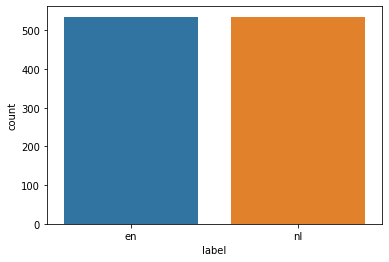

In [ ]:
# plotting the distribution of label
# ---
#
sns.countplot(df['label']);

In [ ]:
# investigating the label distribution
df['label'].value_counts()

nl    535
en    534
Name: label, dtype: int64

From above, we can see that our dataset is unbalanced thus we will need to sample equal no. of records for each label during data preparation to make a balanced dataset.

## <font color='#2F4F4F'>Step 4. Data Preparation</font>

### <font color='#2F4F4F'>3.1 Data Cleaning</font>

In [ ]:
# check for duplicates
df.duplicated().sum()

10

There are 10 duplicates. We will need to drop these.

In [ ]:
# check for missing values
df.isna().sum()

text     0
label    0
dtype: int64

No missing values found. 

In [ ]:
# dropping our duplicates
df = df.drop_duplicates()
df.shape

(1059, 2)

In [ ]:
# What values are in our label variable?
# ---
#
df.label.unique()

array(['en', 'nl'], dtype=object)

In [ ]:
# sampling text with en 
df_en = df[df["label"] == 'en'] 
df_en = df_en.sample(200)

# sampling text with nl 
df_nl = df[df["label"] == 'nl'] 
df_nl = df_nl.sample(200)

# combining our dataframes
df = pd.concat([df_en, df_nl])
df.head()

,text,label
996,The Apostolic Prefecture of Shiqian Shihtsien is a Latin prediocesan missionary jurisdiction of the Catholic,en
865,He played for Indian Super League club Pune City in before returning to Charlton in,en
948,Each cartoon written by Calveley and directed by Bob Godfrey was about five minutes long,en
542,reddish bark and the smaller twigs sometimes have bristly glandular hairs. The leaves are shiny,en
244,left upon artisans and north-western own India society nomadic and the north.[104][105] raising vast to,en


In [ ]:
# investigating the label distribution
df['label'].value_counts()

en    200
nl    200
Name: label, dtype: int64

We now have our balanced dataset. 

### <font color='#2F4F4F'> 3.2 Text Cleaning</font>

In [ ]:
data = df.copy()
df.head()

,text,label
996,The Apostolic Prefecture of Shiqian Shihtsien is a Latin prediocesan missionary jurisdiction of the Catholic,en
865,He played for Indian Super League club Pune City in before returning to Charlton in,en
948,Each cartoon written by Calveley and directed by Bob Godfrey was about five minutes long,en
542,reddish bark and the smaller twigs sometimes have bristly glandular hairs. The leaves are shiny,en
244,left upon artisans and north-western own India society nomadic and the north.[104][105] raising vast to,en


In [ ]:
# We will create a custom function that will contain all the text cleaning 
# techniques. We can then reuse the same function for cleaning new data
# without rewriting the code.
# ---
#
def text_cleaning(txt):
    txt = re.sub(r'#', '', txt)                   # Removing hashtags
    txt = re.sub(r'@[A-Za-z0-9]+', '', txt)       # Removing Mentions
    txt = re.sub(r'https?:\/\/\S+', '', txt)      # Removing Links
    txt = re.sub(r'RT[\s]+', '', txt)             # Removing Retweets
    txt = re.sub(r'\n', ' ', txt)                 # Removing Newline
    txt = re.sub(r"[^a-zA-Z0-9]"," ", txt)        # Removing all special characters
    return txt

In [ ]:
# Applying the text_cleaning function to our dataframe.
# ---
# NB: This process may take 5-10 min.
# ---
#
df["clean_en"] = df["text"].apply(text_cleaning)
df.head()

,text,label,clean_en
996,The Apostolic Prefecture of Shiqian Shihtsien is a Latin prediocesan missionary jurisdiction of the Catholic,en,The Apostolic Prefecture of Shiqian Shihtsien is a Latin prediocesan missionary jurisdiction of the Catholic
865,He played for Indian Super League club Pune City in before returning to Charlton in,en,He played for Indian Super League club Pune City in before returning to Charlton in
948,Each cartoon written by Calveley and directed by Bob Godfrey was about five minutes long,en,Each cartoon written by Calveley and directed by Bob Godfrey was about five minutes long
542,reddish bark and the smaller twigs sometimes have bristly glandular hairs. The leaves are shiny,en,reddish bark and the smaller twigs sometimes have bristly glandular hairs The leaves are shiny
244,left upon artisans and north-western own India society nomadic and the north.[104][105] raising vast to,en,left upon artisans and north western own India society nomadic and the north 104 105 raising vast to


### <font color='#2F4F4F'> 3.3 Feature Engineering</font>

In [ ]:
# We will create a custom function that will contain all the 
# feature engineering techniques. We can then use this function 
# for cleaning new data. 
# ---
#
def custom_feature(feature):
    ln = []
    word = []
    for i in feature:
        ln.append(len(i))
        word.append(len(i.split(" ")))
    
    density = np.array(word)/np.array(ln)
    return ln, word, density

In [ ]:
# Applying the custom feature engineering function to our dataframe.
# This process may take 2-5 min.
# ---
#
ln, word, density = custom_feature(df.text)

df["text_len"] = ln
df["words"] = word
df["density"] = density

In [ ]:
# Performing further feature engineering techniques
# ---
#
import textblob
def get_subjectivity(text):
    return textblob.TextBlob(text).sentiment.subjectivity

df["subjecttivity"]=df.text.apply(get_subjectivity)

# Feature Construction: Word Level N-Gram TF-IDF Feature 
# ---
#
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer(ngram_range=(1, 1), max_features=2000)

df_char_vect = vec.fit_transform(df.text)

# Feature Construction: Character Level N-Gram TF-IDF 
# ---
#
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer(ngram_range=(2, 2), max_features=2000)

df_word_vect = vec.fit_transform(df.text)

In [ ]:
# Let's prepare the constructed features for modeling
# ---
# We will select all variables but the target (which is the label) and text variables 
# ---
#  
X_metadata = np.array(df.iloc[:, 3:7])

In [ ]:
# We combine our two tfidf (sparse) matrices and X_metadata
# ---
#
X = scipy.sparse.hstack([df_word_vect, df_char_vect,  X_metadata]).toarray()

In [ ]:
# Label Preparation i.e. replacing categorial values with numerical ones
# ---  
#
y = df.iloc[:, 1]
y = np.array(y.replace({"en":0, "nl":1}))

##  <font color='#2F4F4F'>Step 5. Data Modeling</font>

We will carry out 10 types of classification analysis, namely:
1.  Logistic Regression
3.  Decision Trees Classification
4.  Support Vector Machine (SVM) Classification
5. K-Nearest Neighbors (KNN) Classification
6.  Gaussian Naive Bayes (NB) Classification
7.  BaggingClassifier
8.  RandomForestClassifier
9.  AdaBoostClassifier
10. GradientBoostingClassifier

We use their default parameters then compare the different classification models to assess the best performing one(s). 

In [ ]:
# splitting into 80-20 train-test sets
# ---
#
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# loading our classification libraries
# ---
#
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier

# instantiating our classifiers
lg = LogisticRegression()
nb = GaussianNB()
dt = DecisionTreeClassifier()
knn = KNeighborsClassifier()
svc = SVC()
rand = RandomForestClassifier()
ada = AdaBoostClassifier()
grad = GradientBoostingClassifier()
bag = BaggingClassifier()

# fitting our classifiers to the training data
lg.fit(X_train, y_train)
nb.fit(X_train, y_train)
dt.fit(X_train, y_train)
knn.fit(X_train, y_train)
svc.fit(X_train, y_train)
rand.fit(X_train, y_train)
ada.fit(X_train, y_train)
grad.fit(X_train, y_train)
bag.fit(X_train, y_train)

# making predictions
pred_lg = lg.predict(X_test)
pred_nb = nb.predict(X_test)
pred_dt = dt.predict(X_test)
pred_knn = knn.predict(X_test)
pred_svc = svc.predict(X_test)
pred_rand = rand.predict(X_test)
pred_ada = ada.predict(X_test)
pred_grad = grad.predict(X_test)
pred_bag = bag.predict(X_test)

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Evaluating the Models
# ---
from sklearn.metrics import accuracy_score

# Accuracy scores
#
print("Accuracy of LogisticRegression is          : ", round(accuracy_score(y_test, pred_lg), 2))
print("Accuracy of GaussianNB is                  : ", round(accuracy_score(y_test, pred_nb), 2))
print("Accuracy of DecisionTreeClassifier is      : ", round(accuracy_score(y_test, pred_dt), 2))
print("Accuracy of KNeighborsClassifier is        : ", round(accuracy_score(y_test, pred_knn), 2))
print("Accuracy of SVC is                         : ", round(accuracy_score(y_test, pred_svc), 2))
print("Accuracy of RandomForestClassifier is      : ", round(accuracy_score(y_test, pred_rand), 2))
print("Accuracy of AdaBoostClassifier is          : ", round(accuracy_score(y_test, pred_ada), 2))
print("Accuracy of GradientBoostingClassifier is  : ", round(accuracy_score(y_test, pred_grad), 2))
print("Accuracy of BaggingClassifier is           : ", round(accuracy_score(y_test, pred_bag), 2))

Accuracy of LogisticRegression is          :  0.99
Accuracy of GaussianNB is                  :  0.99
Accuracy of DecisionTreeClassifier is      :  0.98
Accuracy of KNeighborsClassifier is        :  0.6
Accuracy of SVC is                         :  0.45
Accuracy of RandomForestClassifier is      :  1.0
Accuracy of AdaBoostClassifier is          :  0.99
Accuracy of GradientBoostingClassifier is  :  0.98
Accuracy of BaggingClassifier is           :  1.0


Your observation about the performance of the models...

From these accuracy we can see Except KNN and SVC all models are performing really well 

In [ ]:
# Confusion matrices
# ---

from sklearn.metrics import confusion_matrix
print("Confusion matric of LogisticRegression is          : \n", confusion_matrix(y_test, pred_lg))
print("Confusion matric of GaussianNB is                  : \n", confusion_matrix(y_test, pred_nb))
print("Confusion matric of DecisionTreeClassifier is      : \n", confusion_matrix(y_test, pred_dt))
print("Confusion matric of KNeighborsClassifier is        : \n", confusion_matrix(y_test, pred_knn))
print("Confusion matric of SVC is                         : \n", confusion_matrix(y_test, pred_svc))
print("Confusion matric of RandomForestClassifier is      : \n", confusion_matrix(y_test, pred_rand))
print("Confusion matric of AdaBoostClassifier is          : \n", confusion_matrix(y_test, pred_ada))
print("Confusion matric of GradientBoostingClassifier is  : \n", confusion_matrix(y_test, pred_grad))
print("Confusion matric of BaggingClassifier is           : \n", confusion_matrix(y_test, pred_bag))

Confusion matric of LogisticRegression is          : 
 [[44  0]
 [ 1 35]]
Confusion matric of GaussianNB is                  : 
 [[43  1]
 [ 0 36]]
Confusion matric of DecisionTreeClassifier is      : 
 [[42  2]
 [ 0 36]]
Confusion matric of KNeighborsClassifier is        : 
 [[25 19]
 [13 23]]
Confusion matric of SVC is                         : 
 [[ 0 44]
 [ 0 36]]
Confusion matric of RandomForestClassifier is      : 
 [[44  0]
 [ 0 36]]
Confusion matric of AdaBoostClassifier is          : 
 [[43  1]
 [ 0 36]]
Confusion matric of GradientBoostingClassifier is  : 
 [[42  2]
 [ 0 36]]
Confusion matric of BaggingClassifier is           : 
 [[44  0]
 [ 0 36]]


In [ ]:
# Classification Reports
# ---

from sklearn.metrics import classification_report
# 
print("Classification Report of LogisticRegression is          : \n", classification_report(y_test, pred_lg))
print("Classification Report of GaussianNB is                  : \n", classification_report(y_test, pred_nb))
print("Classification Report of DecisionTreeClassifier is      : \n", classification_report(y_test, pred_dt))
print("Classification Report of KNeighborsClassifier is        : \n", classification_report(y_test, pred_knn))
print("Classification Report of SVC is                         : \n", classification_report(y_test, pred_svc))
print("Classification Report of RandomForestClassifier is      : \n", classification_report(y_test, pred_rand))
print("Classification Report of AdaBoostClassifier is          : \n", classification_report(y_test, pred_ada))
print("Classification Report of GradientBoostingClassifier is  : \n", classification_report(y_test, pred_grad))
print("Classification Report of BaggingClassifier is           : \n", classification_report(y_test, pred_bag))

Classification Report of LogisticRegression is          : 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        44
           1       1.00      0.97      0.99        36

    accuracy                           0.99        80
   macro avg       0.99      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80

Classification Report of GaussianNB is                  : 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        44
           1       0.97      1.00      0.99        36

    accuracy                           0.99        80
   macro avg       0.99      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80

Classification Report of DecisionTreeClassifier is      : 
               precision    recall  f1-score   support

           0       1.00      0.95      0.98        44
           1       0.95      1.00      0.97        36

  

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## <font color='#2F4F4F'>Step 6. Summary of Findings and Recommendation</font>

Your findings and recommendations...

From this classification process of text I have observed that distance based models cannot perform well if your data is related to text. From accuracies we have seen that Except KNN and SVC all models are performing really well without any Hyperoarameter tuning. Both KNN and SVC are distance based model and are not performing well. That's mean for sequence data we can't use distance based model because they will not be performing well

## <font color='#2F4F4F'>Step 7. Challenging our Solution</font>

### a) Did we have the right question?

Yes

### b) Did we have the right data?

Yes, we have right data for our problem.
### c) What can be done to improve the solution? 

Models are already performing very well so they don't need anything to improve but as we have seen that distance based models are not performing well for this data. We can test out different values of their hyperparameters to increase accuracy. But still they will be performing low than other models.